<a href="https://colab.research.google.com/github/SuryakantaGhanta/Image-Classification-using-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from zipfile import ZipFile
import skimage
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models


## Reading image

In [2]:
file_name = "/content/sample_data/animal_classification.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall('/content/sample_data/animal_classification')
    print('Done!')

Extracting all the files now...
Done!


In [3]:
# Combine results of two glob searches
bear_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Bear/*.jpg') + \
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Bear/*.jpeg')
bird_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Bird/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Bird/*.jpeg')
cat_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Cat/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Cat/*.jpeg')
cow_file  = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Cow/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Cow/*.jpeg')
deer_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Deer/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Deer/*.jpeg' )
dog_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Dog/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Dog/*.jpeg')
dolphin_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Dolphin/*.jpg')+\
              glob('/content/sample_data/animal_classification/Animal Classification/dataset/Dolphin/*.jpeg')
elephant_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Elephant/*.jpg')+\
                glob('/content/sample_data/animal_classification/Animal Classification/dataset/Elephant/*.jpeg')
giraffe_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Giraffe/*.jpg')+\
               glob('/content/sample_data/animal_classification/Animal Classification/dataset/Giraffe/*.jpeg ')
horse_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Horse/*.jpg')+\
             glob('/content/sample_data/animal_classification/Animal Classification/dataset/Horse/*.jpeg')
kangaroo_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Kangaroo/*.jpg')+\
                glob('/content/sample_data/animal_classification/Animal Classification/dataset/Kangaroo/*.jpeg')
lion_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Lion/*.jpg')+\
            glob('/content/sample_data/animal_classification/Animal Classification/dataset/Lion/*.jpeg')
panda_file  = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Panda/*.jpg')+\
              glob('/content/sample_data/animal_classification/Animal Classification/dataset/Panda/*.jpeg')
tiger_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Tiger/*.jpg')+\
             glob('/content/sample_data/animal_classification/Animal Classification/dataset/Tiger/*.jpeg')
zebra_file = glob('/content/sample_data/animal_classification/Animal Classification/dataset/Zebra/*.jpg')+\
             glob('/content/sample_data/animal_classification/Animal Classification/dataset/Zebra/*.jpeg')

In [4]:
iml= plt.imread(bear_file[10])
#icv= cv2.imread(bear_file[10])
#icv_rgb= cv2.cvtColor(iml, cv2.COLOR_BGR2RGB)

In [5]:
#bear_file

## Display Image

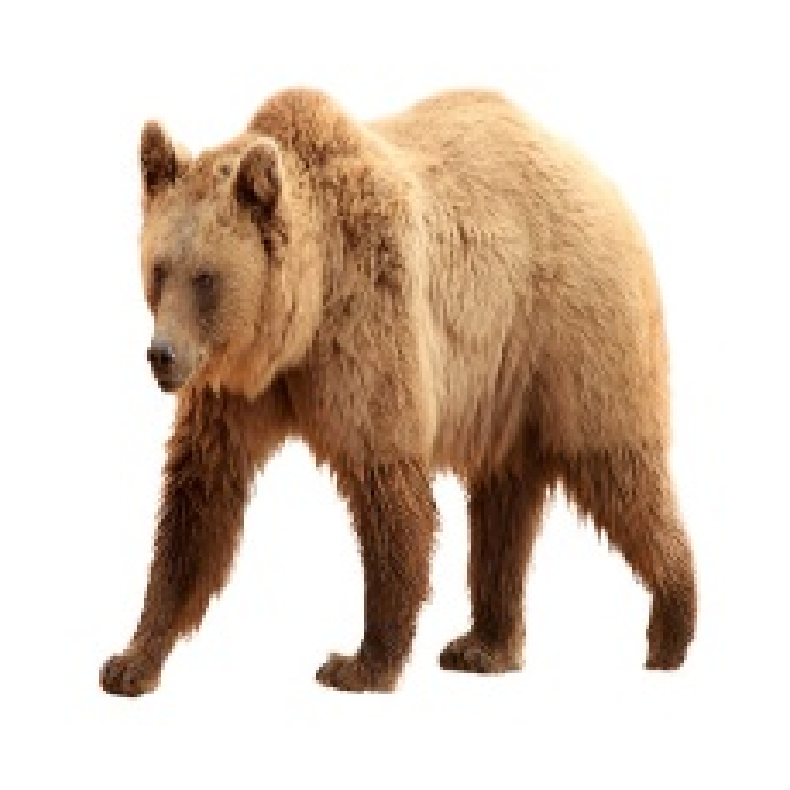

In [6]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(iml)
ax.axis('off')
plt.show()

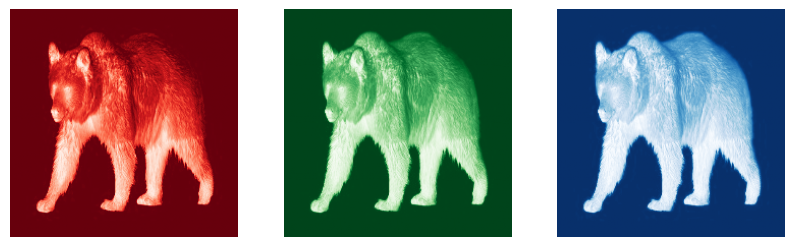

In [7]:
fig, ax=plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(iml[:,:,0],cmap='Reds')
ax[1].imshow(iml[:,:,1],cmap='Greens')
ax[2].imshow(iml[:,:,2],cmap='Blues')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()


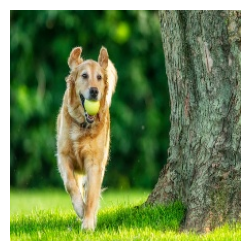

In [8]:
imd = plt.imread(dog_file[3])
fig, ax=plt.subplots(figsize=(3,3))
ax.imshow(imd)
ax.axis('off')
plt.show()

# Data Preprocessing

In [37]:
class_label_mapping = {
    'bear': 0,
    'bird': 1,
    'cat': 2,
    'cow': 3,
    'deer': 4,
    'dog': 5,
    'dolphin': 6,
    'elephant': 7,
    'giraffe': 8,
    'horse': 9,
    'kangaroo': 10,
    'lion': 11,
    'panda': 12,
    'tiger': 13,
    'zebra': 14
}

# Initialize lists to store image data and labels
image_data = []
labels = []

# Combine all file paths into one list
all_file_paths = [(bear_file ,'bear'),
                  (bird_file,'bird'),
                  (cat_file, 'cat'),
                  (cow_file, 'cow'),
                  (deer_file, 'deer'),
                  (dog_file, 'dog'),
                  (dolphin_file, 'dolphin'),
                  (elephant_file, 'elephant'),
                  (giraffe_file ,'giraffe'),
                  (horse_file ,'horse'),
                  (kangaroo_file, 'kangaroo' ),
                  (lion_file,'lion'),
                  (panda_file,'panda'),
                  (tiger_file,'tiger'),
                  (zebra_file, 'zebra')]

#all_file_paths

In [38]:
# Iterate through files and labels
for file_paths, class_name in all_file_paths:
    for file_path in file_paths:
        # Load the image
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Resize the image
        resized_image = cv2.resize(image, (128, 128))

        # Normalize the image
        normalized_image = resized_image / 255.0

        # Append the image data and label to the respective lists
        image_data.append(normalized_image)
        labels.append(class_label_mapping[class_name])

# Convert lists to NumPy arrays
X = np.array(image_data)
y = np.array(labels)
y

array([ 0,  0,  0, ..., 14, 14, 14])

# Function for cross-validation

In [41]:
class_label =['bear', 'bird', 'cat', 'cow', 'deer', 'dog', 'dolphin', 'elephant', 'giraffe',
 'horse', 'kangaroo', 'lion' ,'panda', 'tiger', 'zebra']


def sample(x,y,index):
    plt.figure(figsize=(6,5))
    plt.imshow(x[index])
    plt.xlabel(class_label[y[index]])

#class_label[3]

# Train Test Split of the given Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_test.shape
y_test[:5]

array([ 9, 12,  4,  3,  3])

# Model: Convolutional Neural Network (CNN)

In [18]:
cnn =models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(28, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.0942 - loss: 2.9666
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2576 - loss: 2.2801
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3371 - loss: 2.1803
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5162 - loss: 1.6164
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6525 - loss: 1.2332
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7252 - loss: 1.0001
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8269 - loss: 0.6578
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8871 - loss: 0.4205
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9574 - loss: 0.1993
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9560 - loss: 0.2480


# Model Accuracy

In [23]:
cnn.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 404ms/step - accuracy: 0.7239 - loss: 1.9065


[2.0539352893829346, 0.7194805145263672]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step


array([[1.67340204e-06, 7.00548117e-06, 7.90131249e-09, 2.85645274e-05,
        5.25446131e-09, 1.18311103e-08, 2.53362928e-15, 3.08532653e-05,
        2.42685576e-11, 9.98646319e-01, 1.26909034e-03, 1.64089852e-05,
        4.77635882e-11, 1.00559587e-08, 8.28042024e-10, 5.38057273e-25,
        5.36971888e-20, 1.48594270e-22, 4.09952044e-21, 3.81136705e-33,
        1.11694798e-21, 3.81919104e-21, 8.88517476e-28, 6.20478543e-30,
        9.97264704e-23, 1.51496051e-23, 1.02411155e-24, 1.31956569e-20],
       [1.27731468e-07, 6.44552678e-09, 1.21971241e-15, 8.85282516e-13,
        6.16095832e-08, 4.09255477e-11, 2.70934242e-17, 4.61370742e-13,
        4.06732373e-12, 1.09752107e-09, 2.74803846e-09, 1.17446636e-10,
        9.99999106e-01, 5.82733776e-07, 1.06713127e-13, 1.99666514e-29,
        7.46541489e-20, 2.28910523e-25, 7.81527811e-27, 1.38709109e-37,
        8.01386010e-29, 3.67032406e-24, 9.04047432e-32, 1.64696140e-28,
        7.23168639e-31, 1.11452813e-24, 4.30965133e-29, 1.03430

In [26]:
y_pred_classes = [np.argmax(i) for i in y_pred]
y_pred_classes[:5]

[9, 12, 4, 3, 0]

# Model Validation

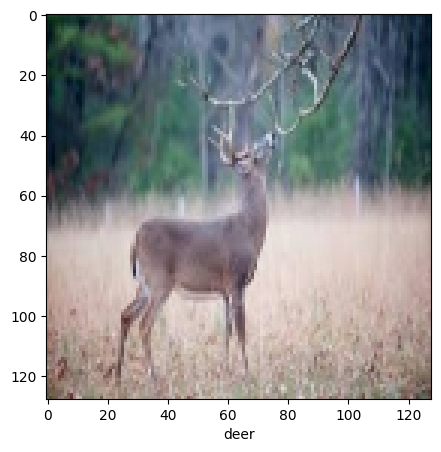

In [48]:
sample(X_test,y_test, 6)

In [49]:
class_label[y_pred_classes[6] ]

'deer'